In [1]:
from __future__ import division

import stain_utils as utils
# import stainNorm_Reinhard
import stainNorm_Macenko
# import stainNorm_Vahadane
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import tqdm

In [3]:
import sys
sys.path.append("..")

In [4]:
from utils.load_data import load_data

Using TensorFlow backend.


In [20]:
data_dir = '../data/'

x_train, y_train, x_valid, y_valid = load_data(data_dir, purpose='train', limit=300, val_limit=300)
len(x_train), len(x_valid)

(300, 300)

In [21]:
def show(image, now=True, fig_size=(10, 10)):
    image = image.astype(np.float32)
    m, M = image.min(), image.max()
    if fig_size != None:
        plt.rcParams['figure.figsize'] = (fig_size[0], fig_size[1])
    plt.imshow((image - m) / (M - m), cmap='gray')
    plt.axis('off')
    if now == True:
        plt.show()

# Normalizer

In [22]:
n = stainNorm_Macenko.Normalizer()

In [23]:
first_x = x_train[10]
first_y = y_train[10]
x_train = np.delete(x_train, 10, 0)
y_train = np.delete(y_train, 10, 0)
len(x_train), len(y_train)

(299, 299)

In [24]:
n.fit(first_x)

In [27]:
logf = open('./logs/magenko_train_skipped_test.txt', 'w')
    
t = () 
for i, x_ in enumerate(tqdm(x_train)):
    norm_x = None
    try:
        norm_x = n.transform(x_)
    except Exception as e:
        logf.write(str(i) + '; ' + str(e))
        y_train = np.delete(y_train, i, 0)
        continue

    t = t + (norm_x,)
    print(len(t))

logf.close()

  4%|▍         | 12/299 [00:00<00:05, 55.66it/s]

1
2
3
4
5
6
7
8
9
10
11
12


  8%|▊         | 24/299 [00:00<00:04, 56.67it/s]

13
14
15
16
17
18
19
20
21
22
23
24
25


 12%|█▏        | 37/299 [00:00<00:04, 58.12it/s]

26
27
28
29
30
31
32
33
34
35
36
37


 16%|█▋        | 49/299 [00:00<00:04, 57.56it/s]

38
39
40
41
42
43
44
45
46
47
48
49


 20%|██        | 61/299 [00:01<00:04, 58.06it/s]

50
51
52
53
54
55
56
57
58
59
60
61


 24%|██▍       | 73/299 [00:01<00:03, 57.06it/s]

62
63
64
65
66
67
68
69
70
71
72
73


 28%|██▊       | 85/299 [00:01<00:03, 57.60it/s]

74
75
76
77
78
79
80
81
82
83
84
85


 32%|███▏      | 97/299 [00:01<00:03, 58.28it/s]

86
87
88
89
90
91
92
93
94
95
96
97


 36%|███▋      | 109/299 [00:01<00:03, 58.27it/s]

98
99
100
101
102
103
104
105
106
107
108
109


 41%|████      | 122/299 [00:02<00:02, 59.03it/s]

110
111
112
113
114
115
116
117
118
119
120
121
122


 43%|████▎     | 129/299 [00:02<00:02, 59.61it/s]

123
124
125
126
127
128
129
130
131
132
133
134


 48%|████▊     | 143/299 [00:02<00:02, 59.46it/s]

135
136
137
138
139
140
141
142
143
144
145
146


 53%|█████▎    | 157/299 [00:02<00:02, 59.02it/s]

147
148
149
150
151
152
153
154
155
156
157
158


 57%|█████▋    | 170/299 [00:02<00:02, 59.42it/s]

159
160
161
162
163
164
165
166
167
168
169
170
171


 61%|██████    | 183/299 [00:03<00:01, 59.50it/s]

172
173
174
175
176
177
178
179
180
181
182
183


 66%|██████▌   | 196/299 [00:03<00:01, 58.63it/s]

184
185
186
187
188
189
190
191
192
193
194
195


 68%|██████▊   | 202/299 [00:03<00:01, 57.82it/s]

196
197
198
199
200
201
202
203
204
205
206
207


 72%|███████▏  | 216/299 [00:03<00:01, 59.79it/s]

208
209
210
211
212
213
214
215
216
217
218
219
220


 76%|███████▋  | 228/299 [00:03<00:01, 59.37it/s]

221
222
223
224
225
226
227
228
229
230
231
232


 80%|████████  | 240/299 [00:04<00:01, 58.33it/s]

233
234
235
236
237
238
239
240
241
242
243
244


 84%|████████▍ | 252/299 [00:04<00:00, 58.78it/s]

245
246
247
248
249
250
251
252
253
254
255
256


 88%|████████▊ | 264/299 [00:04<00:00, 57.91it/s]

257
258
259
260
261
262
263
264
265
266
267
268


 93%|█████████▎| 277/299 [00:04<00:00, 58.19it/s]

269
270
271
272
273
274
275
276
277
278
279
280


 97%|█████████▋| 289/299 [00:04<00:00, 58.22it/s]

281
282
283
284
285
286
287
288
289
290
291
292


100%|██████████| 299/299 [00:05<00:00, 58.54it/s]


293
294
295
296
297
298


In [28]:
bs_inputs = (first_x,) + t
len(bs_inputs)

299

In [29]:
x_train_norm = utils.build_stack(bs_inputs)
len(x_train_norm)

299

In [57]:
y_train = np.concatenate((np.array([first_y]), y_train))
len(y_train)

298

In [103]:
ind = 3

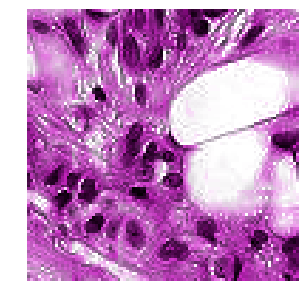

In [112]:
plt.figure(figsize=(8,5))
show(t[ind])

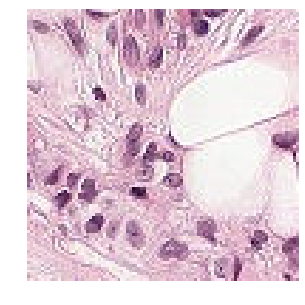

In [111]:
plt.figure(figsize=(8,5))
show(x_train[ind])

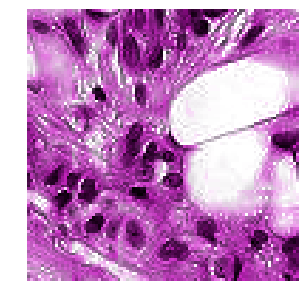

In [119]:
plt.figure(figsize=(8,5))
show(x_train_norm[ind-1])

## Save

In [72]:
import os
import gzip

In [76]:
import numpy as np
import h5py
h5f = h5py.File('camelyonpatch_level_2_split_train_x_macenko.h5', 'w')
h5f.create_dataset('x', data=norm_stack, compression='gzip')
h5f.close()

In [59]:
from keras.utils import HDF5Matrix

In [ ]:
X_data = HDF5Matrix('input/file.hdf5', 'data')

In [62]:
x_train = HDF5Matrix('data.h5', 'dataset_1')

In [82]:
pc_train_x_h5 = gzip.open('camelyonpatch_level_2_split_train_x_macenko.h5.gz', 'rb')

In [83]:
type(pc_train_x_h5)

gzip.GzipFile

In [92]:
hede = HDF5Matrix('./camelyonpatch_level_2_split_train_x_macenko.h5.gz', 'x')

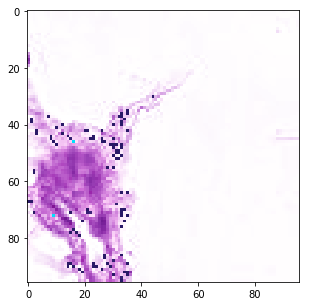

In [93]:
plt.figure(figsize=(8,5))
plt.imshow(n.transform(hede[4]))